In [2]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
# Load the Facebook-Ego network
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

{29: 2, 45: 1, 17: 5, 28: 3, 44: 2, 57: 1, 13: 6, 21: 5, 24: 4, 18: 3, 35: 3, 23: 3, 48: 1, 54: 1, 19: 3, 38: 2, 41: 1, 12: 8, 7: 6, 6: 4, 5: 8, 22: 2, 15: 2, 3: 6, 40: 1, 14: 2, 30: 2, 2: 10, 27: 1, 1: 8, 11: 1, 32: 4, 64: 1, 20: 4, 33: 2, 10: 5, 4: 7, 37: 2, 8: 3, 39: 1, 9: 3, 43: 1, 34: 1, 16: 4, 25: 1, 31: 2}


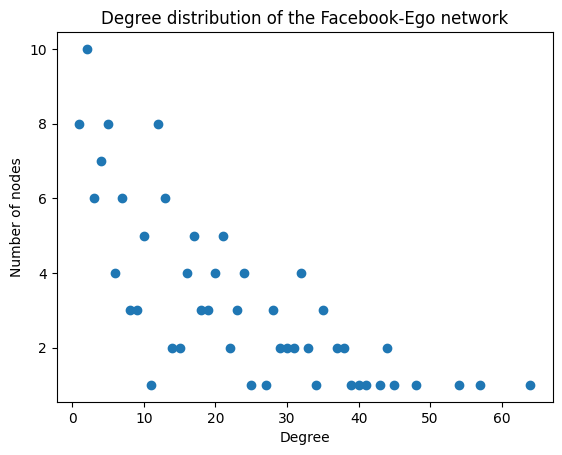

In [5]:
#Question (a)
# Calculate the degree sequence for facebook
degree_sequence = [d for n, d in facebook_network.degree()]
degree_count = dict()

for d in degree_sequence:
    if d in degree_count:
        degree_count[d] += 1
    else:
        degree_count[d] = 1

print(degree_count)
# Plot the degree distribution
plt.scatter(degree_count.keys(), degree_count.values())
plt.title("Degree distribution of the Facebook-Ego network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()




# Calculate the degree sequence Twitter
degree_sequence = [d for n, d in twitter_network.degree()]
degree_count = dict()
for d in degree_sequence:
    if d in degree_count:
        degree_count[d] += 1
    else:
        degree_count[d] = 1

print(degree_count)
# Plot the degree distribution
plt.scatter(degree_count.keys(), degree_count.values())
plt.title("Degree distribution of the Twitter-Ego network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

In [4]:
##Question (b)
print("""

To understand how these networks differ from a random one, it's important to look closely at the patterns in how the degrees are distributed.

Imporant Observations about Facebook Network and Twitter Network:

1. For Facebook Network:
   - There is variability in degrees, with higher counts at specific degrees (e.g., 2, 3, 4, 6, 8, 10).
   - The network has nodes with higher degrees (e.g., 12, 13, 15).
   - The distribution lacks a strict regularity.

2. For Twitter Network:
   - Similarly to Facebook, there is variability in degrees, with higher counts at specific degrees (e.g., 2, 3, 4, 6, 7, 8, 9).
   - Higher degrees are present in the network (e.g., 12, 28, 50).
   - The distribution does not follow a strict regular pattern.

Comparison with a Random Network:

In examining the degree distributions of both the Facebook and Twitter networks, a striking commonality emerges—non-random patterns. 
Unlike what one might expect in a completely random network, these distributions showcase variability, hinting at a more intricate structure. 
Notably, both networks feature nodes with higher degrees, suggesting the existence of hubs or nodes highly interconnected with others.

This phenomenon is indicative of preferential attachment, a trend observed in both networks. The higher counts at specific degrees imply that nodes 
with elevated degrees tend to attract new connections more frequently. Such preferential attachment is a well-known feature in real-world networks 
and significantly contributes to the development of hubs within these systems.

Further enriching the analysis, the variability in degrees in both networks alludes to potential community structures. While degree distributions 
alone don't unveil the specifics of community organization, the observed diversity in degrees hints at the presence of distinct communities or 
clusters within the intricate fabric of the networks.


Causes of Differences:

1. Purpose and Function:
   - Real-world networks often have specific purposes or functions that influence their structure. 
      Social networks like Facebook and Twitter are shaped by user behaviors and preferences, contributing to non-random patterns.

2. Node Addition Mechanisms:
   - How new nodes are added to the network can affect the degree distribution. If new nodes preferentially attach to existing nodes with higher 
      degrees, this can lead to a distribution with hubs.

3. Evolutionary Processes:
   - Over time, networks evolve based on user interactions, preferences, and external factors. This evolutionary process can result in non-random 
   structures.
In conclusion, the primary difference between the chosen networks (Facebook and Twitter) and a random network with the same number of nodes lies in 
the presence of non-random patterns, such as preferential attachment and degree variability. The causes of these differences are rooted in the 
purpose and function of the networks, node addition mechanisms, and evolutionary processes shaping the networks.      
      """)




To understand how these networks differ from a random one, it's important to look closely at the patterns in how the degrees are distributed.

Imporant Observations about Facebook Network and Twitter Network:

1. For Facebook Network:
   - There is variability in degrees, with higher counts at specific degrees (e.g., 2, 3, 4, 6, 8, 10).
   - The network has nodes with higher degrees (e.g., 12, 13, 15).
   - The distribution lacks a strict regularity.

2. For Twitter Network:
   - Similarly to Facebook, there is variability in degrees, with higher counts at specific degrees (e.g., 2, 3, 4, 6, 7, 8, 9).
   - Higher degrees are present in the network (e.g., 12, 28, 50).
   - The distribution does not follow a strict regular pattern.

Comparison with a Random Network:

In examining the degree distributions of both the Facebook and Twitter networks, a striking commonality emerges—non-random patterns. 
Unlike what one might expect in a completely random network, these distributions showcas

In [6]:
## Question c

# Calculate the shortest path length between all pairs of nodes for Facebook-Ego network
shortest_path_lengths_facebook = dict(nx.shortest_path_length(facebook_network))

# Calculate the average shortest path length for Facebook-Ego network
avg_shortest_path_length_facebook = np.mean([length for source in shortest_path_lengths_facebook for length in shortest_path_lengths_facebook[source].values()])

print("The average path length of the Facebook-Ego network is:", avg_shortest_path_length_facebook)

# Calculate the shortest path length between all pairs of nodes for Twitter-Ego network
shortest_path_lengths_twitter = dict(nx.shortest_path_length(twitter_network))

# Calculate the average shortest path length for Twitter-Ego network
avg_shortest_path_length_twitter = np.mean([length for source in shortest_path_lengths_twitter for length in shortest_path_lengths_twitter[source].values()])

print("The average path length of the Twitter-Ego network is:", avg_shortest_path_length_twitter)


The average path length of the Facebook-Ego network is: 2.446421096693177
The average path length of the Twitter-Ego network is: 3.584276475343573


In [8]:
##Question d

# Function to randomly select k nodes from a network
def random_nodes(graph, k):
    return random.sample(graph.nodes(), k)

# Function to calculate clustering coefficient for a node in a graph
def calculate_clustering_coefficient(graph, node):
    return nx.clustering(graph, node)

# Randomly choose 5 nodes for Facebook-Ego network
random_nodes_facebook = random_nodes(facebook_network, 5)
# Randomly choose 5 nodes for Twitter-Ego network
random_nodes_twitter = random_nodes(twitter_network, 5)

# Calculate clustering coefficients for each node in Facebook-Ego network
clustering_coefficients_facebook = [calculate_clustering_coefficient(facebook_network, node) for node in random_nodes_facebook]
# Calculate clustering coefficients for each node in Twitter-Ego network
clustering_coefficients_twitter = [calculate_clustering_coefficient(twitter_network, node) for node in random_nodes_twitter]

print("=============================================================================================================")
# Print the results for Facebook-Ego network
print("Random Nodes (Facebook):", random_nodes_facebook)
print("Clustering Coefficients (Facebook):", clustering_coefficients_facebook)

print("=============================================================================================================")
# Print the results for Twitter-Ego network
print("Random Nodes (Twitter):", random_nodes_twitter)
print("Clustering Coefficients (Twitter):", clustering_coefficients_twitter)
print("=============================================================================================================")


Random Nodes (Facebook): [482, 441, 448, 468, 462]
Clustering Coefficients (Facebook): [0.5612648221343873, 0.9, 1.0, 0, 0.6666666666666666]
Random Nodes (Twitter): [52613032, 19957312, 23654341, 18331980, 357032926]
Clustering Coefficients (Twitter): [0.12121212121212122, 0.6516393442622951, 0.075, 0.7099236641221374, 0.6532258064516129]


/tmp/ipykernel_10863/1334697452.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  return random.sample(graph.nodes(), k)


In [9]:
##Question e

# Calculate the average clustering coefficient of the network
avg_clustering_coefficient_facebook = nx.average_clustering(facebook_network)
# Calculate the average clustering coefficient of the network
avg_clustering_coefficient_twitter = nx.average_clustering(twitter_network)

print("The average clustering coefficient for the facebook-Ego network is:", avg_clustering_coefficient_facebook)
print("The average clustering coefficient for the Twitter-Ego network is:", avg_clustering_coefficient_twitter)

The average clustering coefficient for the facebook-Ego network is: 0.4900622304455071
The average clustering coefficient for the Twitter-Ego network is: 0.38527956693070126


In [10]:
##Question (f)

#For facebook_network
largest_component_facebook = max(nx.connected_components(facebook_network), key=len)
nodes_in_largest_component_facebook = list(largest_component_facebook)

print("Nodes in the largest component of the Facebook-Ego network:")
print(nodes_in_largest_component_facebook)

Nodes in the largest component of the Facebook-Ego network:
[34, 173, 349, 350, 352, 353, 354, 355, 356, 357, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 380, 381, 382, 383, 384, 385, 387, 388, 389, 390, 391, 392, 394, 395, 396, 397, 398, 400, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 442, 443, 444, 445, 446, 448, 449, 450, 451, 452, 453, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496]


In [11]:
# Assuming you have the Twitter-Ego network stored in the variable 'twitter_network'
strongly_connected_components_twitter = list(nx.strongly_connected_components(twitter_network))

# Find the largest strongly connected component
largest_component_twitter = max(strongly_connected_components_twitter, key=len)
nodes_in_largest_component_twitter = list(largest_component_twitter)

print("Nodes in the largest strongly connected component of the Twitter-Ego network:")
print(nodes_in_largest_component_twitter)

Nodes in the largest strongly connected component of the Twitter-Ego network:
[6054912, 199009284, 27998216, 19364873, 20136458, 17020962, 60923426, 14100010, 18953259, 194677810, 20039230, 19957312, 7861312, 289759808, 51171395, 19702854, 191477840, 12152402, 20777047, 90420314, 276963941, 17350250, 333449324, 388212339, 145852539, 18963070, 40196232, 8115852, 21966989, 30614676, 19970709, 44874400, 113134752, 31123109, 7846, 30104231, 19795629, 151232686, 30231735, 42861755, 160143038, 117848769, 21447363, 20015311, 268806872, 19233002, 113126125, 27825390, 34747631, 19129073, 15670515, 7111412, 14202104, 203694329, 19982092, 64496398, 17836026, 1976611, 44101412, 19095849, 19586880, 20083529, 18331980, 172814159, 15294801, 23873876, 20137301, 24737621, 352226135, 18265433, 181750109, 16464746, 1715051, 20079982, 39348085, 26465656, 33174013, 6353802, 53297035, 20230544, 297074078, 95233955, 66561957, 52613032, 78207918, 215952307, 18980276, 78129590, 20138935, 79312312, 538245048, 1